# <h5 style = 'font-size:45px'> <span style = 'color:yellow'> Link <span> </h5>
[Markdown꾸미기](https://leedakyeong.tistory.com/entry/Markdown-Jupyter-Notebook-%EC%A3%BC%ED%94%BC%ED%84%B0-%EB%85%B8%ED%8A%B8%EB%B6%81-%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EC%A0%95%EB%A6%AC)  
[Notion](https://gravel-turnover-821.notion.site/850bc7ba43a44299ae41bd4144d7462f)

<h5> <span style = 'color:blue'> Cow Project<span> </h5>

<img src = 'https://www.newsworks.co.kr/news/photo/202103/537213_423279_554.jpg' width = '500px' height ='300px' title = 'Cow project' alt = 'Error image'></img><br/>

In [1]:
# Using package
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plot korean title
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<h4> 파일에 존재하는 데이터 한꺼번에 불러오기 </h4>

In [2]:
os.chdir('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 5계대')
os.getcwd()

'C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 5계대'

In [ ]:
# 파일이 존재하는 경로 불러오기 및 리스트
path = os.getcwd()
file_lst = os.listdir(path)# 파일 이름 담기
file_lst

In [4]:
# 반복문으로 파일 불러오기
df = pd.DataFrame()
for i in file_lst:
    data = pd.read_excel(path +'/'+i)
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [82]:
df.근내지방도.value_counts()

6.0    12689
4.0     6786
5.0     5015
7.0     5003
9.0     4721
8.0     4517
3.0     3368
2.0     2986
1.0     1143
Name: 근내지방도, dtype: int64

<h5> 값은 제대로 들어왔으나, 변수명은 깨져서 이상하게 들어옴 => 변수명 재설정 </h5>

In [83]:
cow = df.copy()

In [84]:
cow.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,외증조할미형매 등심단면적 평균,외증조할미형매 등지방 평균,외증조할미형매 근내지방 평균,외증조할미형매 마릿수,외고고조할미 이표번호,외증조할미형매 도체중 평균.1,외증조할미형매 등심단면적 평균.1,외증조할미형매 등지방 평균.1,외증조할미형매 근내지방 평균.1,외증조할미형매 마릿수.1
0,2144933791,KPN969,수,2019-09-15,31,2022-03-28,1+B,410,97.0,14.0,...,76.57,11.43,2.86,7,138524360,280.0,64.0,10.0,2.0,1
1,2133571629,KPN1116,거세,2018-10-14,30,2021-03-29,2A,296,73.0,5.0,...,76.57,11.43,2.86,7,138524360,280.0,64.0,10.0,2.0,1
2,2144063782,KPN1053,수,2020-01-01,35,2022-11-23,1B,472,99.0,12.0,...,86.00,12.00,4.33,3,2018926674,427.0,82.0,11.0,3.0,1
3,2139632868,KPN1130,암,2019-06-19,42,2022-11-23,1++A,326,77.0,8.0,...,79.67,8.00,4.67,3,182624452,347.0,84.0,10.0,5.0,1
4,2144690939,KPN1202,암,2019-08-14,40,2022-11-23,1C,403,84.0,17.0,...,83.00,8.00,2.00,1,175189104,276.0,67.0,16.0,3.0,1


In [85]:
# 원래 변수명
cow.columns = ['이표번호', 'KPN','성별','출생일','도축개월','도축일','등급','도체중','등심단면적','등지방두께', '근내지방도', '육색', '지방색',
	'성숙도', '조직도', '어미_이표번호','형매_도체중_평균', '형매_등심단면적_평균', '형매_등지방_평균', '형매_근내지방_평균',
    '형매_마릿수', '외할미_이표번호', '어미형매_도체중_평균', '어미형매_등심단면적_평균', '어미형매_등지방_평균', '어미형매_근내지방_평균',
    '어미형매_마릿수', '외증조할미_이표번호', '외할미형매_도체중_평균', '외할미형매_등심단면적_평균', '외할미형매_등지방_평균',
    '외할미형매_근내지방_평균', '외할미형매_마릿수', '외고조할미_이표번호', '외증조할미형매_도체중_평균', '외증조할미형매_등심단면적_평균',
    '외증조할미형매_등지방_평균', '외증조할미형매_근내지방_평균', '외증조할미형매_마릿수', '외고고조할미_이표번호',
    '외증조할미형매_도체중_평균', '외증조할미형매_등심단면적_평균', '외증조할미형매_등지방_평균', '외증조할미형매_근내지방_평균',
    '외증조할미형매_마릿수'
]

In [86]:
# 제대로 수정됐음
cow.columns

Index(['이표번호', 'KPN', '성별', '출생일', '도축개월', '도축일', '등급', '도체중', '등심단면적',
       '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미_이표번호', '형매_도체중_평균',
       '형매_등심단면적_평균', '형매_등지방_평균', '형매_근내지방_평균', '형매_마릿수', '외할미_이표번호',
       '어미형매_도체중_평균', '어미형매_등심단면적_평균', '어미형매_등지방_평균', '어미형매_근내지방_평균',
       '어미형매_마릿수', '외증조할미_이표번호', '외할미형매_도체중_평균', '외할미형매_등심단면적_평균',
       '외할미형매_등지방_평균', '외할미형매_근내지방_평균', '외할미형매_마릿수', '외고조할미_이표번호',
       '외증조할미형매_도체중_평균', '외증조할미형매_등심단면적_평균', '외증조할미형매_등지방_평균',
       '외증조할미형매_근내지방_평균', '외증조할미형매_마릿수', '외고고조할미_이표번호', '외증조할미형매_도체중_평균',
       '외증조할미형매_등심단면적_평균', '외증조할미형매_등지방_평균', '외증조할미형매_근내지방_평균', '외증조할미형매_마릿수'],
      dtype='object')

In [88]:
cow.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\cow_full.csv',encoding='cp949',index=False)

In [2]:
cow = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\cow_total.csv',encoding='cp949')

In [7]:
cow.shape

(46310, 45)

In [9]:
cow.columns

Index(['id', 'kpn', 'gender', 'bir', 'sl_m', 'sl_d', 'class', 's_w', 'i_a',
       'f_t', 'target', 'b_c', 'f_c', 'm_l', 'organ', 'mom_id', 's_m_w',
       's_m_i', 's_f_m', 's_t_m', 's_c', 'a_id', 'a_s_m_w', 'a_s_m_i',
       'a_s_f_m', 'a_s_t_m', 'a_s_c', 'b_id', 'b_s_m_w', 'b_s_m_i', 'b_s_f_m',
       'b_s_t_m', 'b_s_c', 'c_id', 'c_s_m_w', 'c_s_m_i', 'c_s_f_m', 'c_s_t_m',
       'c_s_c', 'd_id', 'd_s_m_w', 'd_s_m_i', 'd_s_f_m', 'd_s_t_m', 'd_s_c'],
      dtype='object')

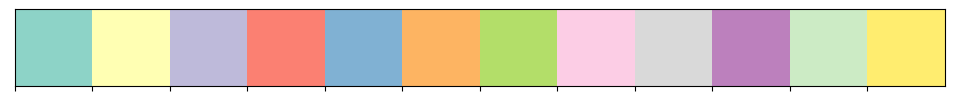

In [3]:
# 색깔 설정
palette = sns.color_palette('Set3')
sns.palplot(palette)

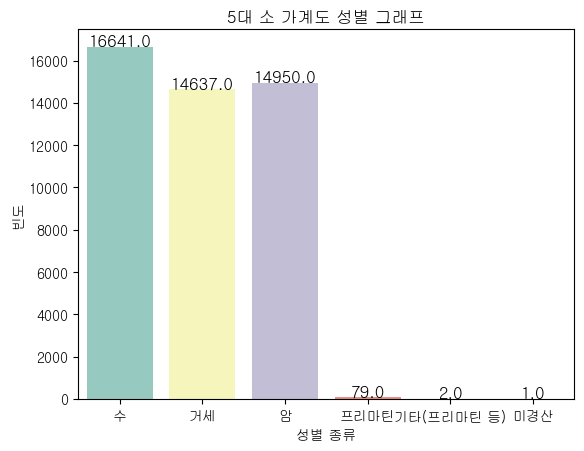

In [9]:
# 성별 그래프
ax = sns.countplot(x = 'gender', data=cow, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
plt.title('5대 소 가계도 성별 그래프')
plt.xlabel('성별 종류')
plt.ylabel('빈도')
plt.show()

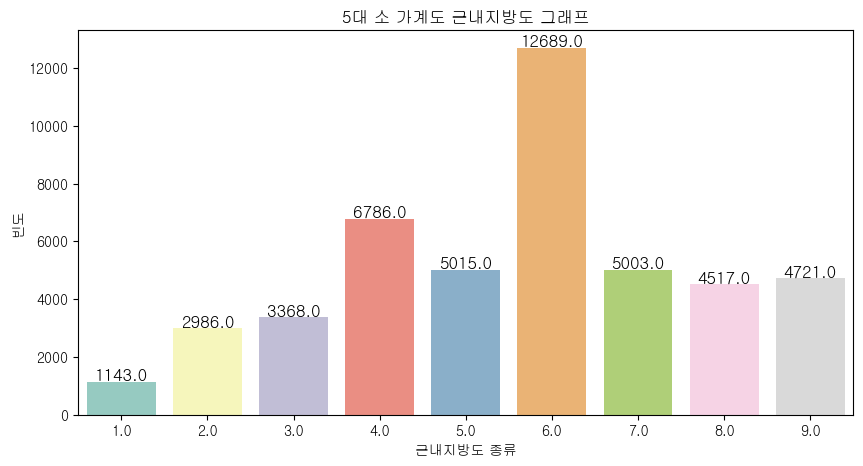

In [10]:
# 근내지방도 그래프
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'target', data=cow, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('5대 소 가계도 근내지방도 그래프')

plt.xlabel('근내지방도 종류')
plt.ylabel('빈도')
plt.show()

In [5]:
cow['class'].unique()

array(['1+B', '2A', '1B', '1++A', '1C', '3A', '1A', '2B', '1+A', '1++B',
       '1+C', '2C', '1++C', '3B', '3C', '등외'], dtype=object)

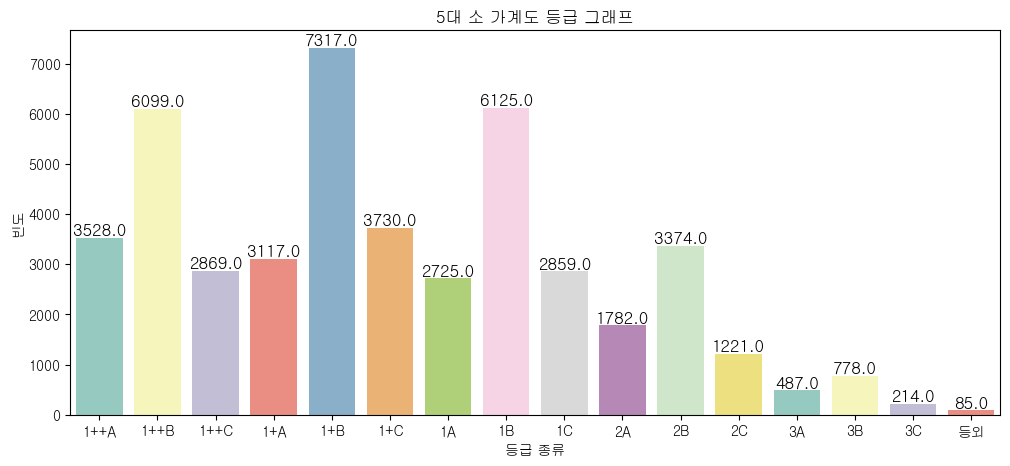

In [6]:
# 등급 그래프
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'class', data=cow, palette=palette, order= ['1++A', '1++B', '1++C', '1+A','1+B', '1+C', '1A', '1B', '1C','2A', '2B',  
       '2C',  '3A', '3B', '3C', '등외'])

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('5대 소 가계도 등급 그래프')
plt.xlabel('등급 종류')
plt.ylabel('빈도')

plt.show()

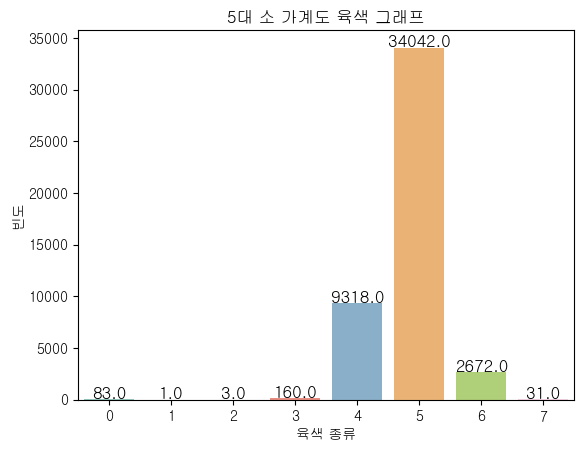

In [7]:
# 육색 그래프
ax = sns.countplot(x = 'b_c', data=cow, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('5대 소 가계도 육색 그래프')

plt.xlabel('육색 종류')
plt.ylabel('빈도')
plt.show()

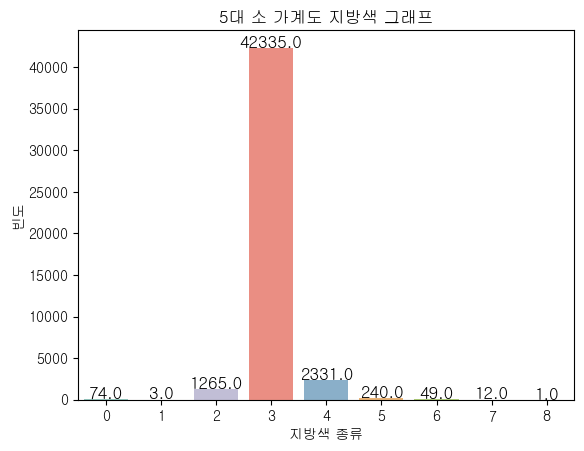

In [8]:
# 지방색 그래프
ax = sns.countplot(x = 'f_c', data=cow, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('5대 소 가계도 지방색 그래프')

plt.xlabel('지방색 종류')
plt.ylabel('빈도')
plt.show()

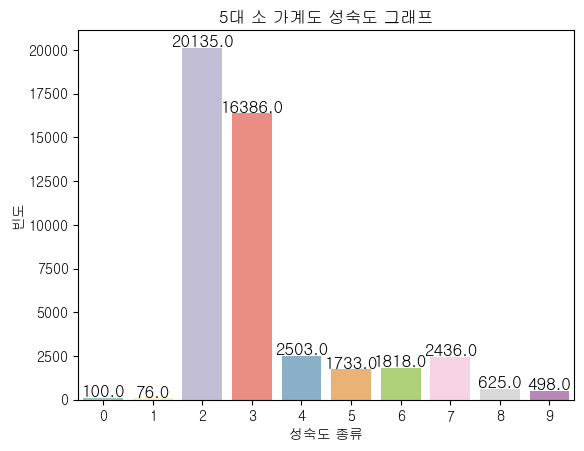

In [10]:
# 성숙도 그래프
ax = sns.countplot(x = 'm_l', data=cow, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('5대 소 가계도 성숙도 그래프')

plt.xlabel('성숙도 종류')
plt.ylabel('빈도')
plt.show()

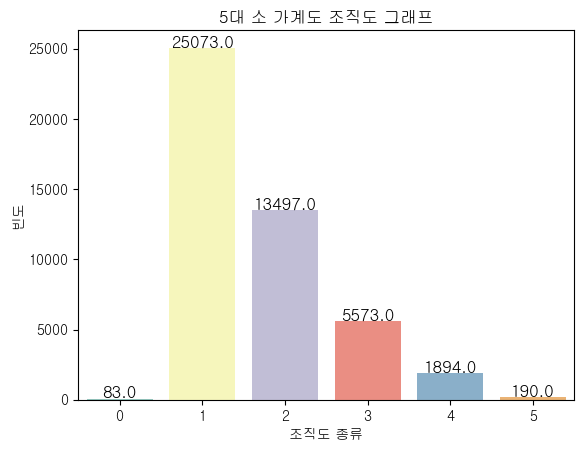

In [11]:
# 조직도 그래프
ax = sns.countplot(x = 'organ', data=cow, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('5대 소 가계도 조직도 그래프')

plt.xlabel('조직도 종류')
plt.ylabel('빈도')
plt.show()

In [77]:
cow_full_5 = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\5계대 정리\\cow_full.csv',encoding='cp949')

In [79]:
cow_full_5.columns

Index(['이표번호', 'KPN', '성별', '출생일', '도축개월', '도축일', '등급', '도체중', '등심단면적',
       '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '형매 도체중 평균',
       '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수', '외할미 이표번호',
       '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균', '어미형매 근내지방 평균',
       '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균', '외할미형매 등심단면적 평균',
       '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수', '외고조할미 이표번호',
       '외증조할미형매 도체중 평균', '외증조할미형매 등심단면적 평균', '외증조할미형매 등지방 평균',
       '외증조할미형매 근내지방 평균', '외증조할미형매 마릿수', '외고고조할미 이표번호', '외고조할미형매 도체중 평균',
       '외고조할미형매 등심단면적 평균', '외고조할미형매 등지방 평균', '외고조할미형매 근내지방 평균', '외고조할미형매 마릿수'],
      dtype='object')

<h5> MultiPlot 하면 한번에 봐서 편한데 Figure설정이 제대로 안됨, 그래서 따로 그림 </h5>

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


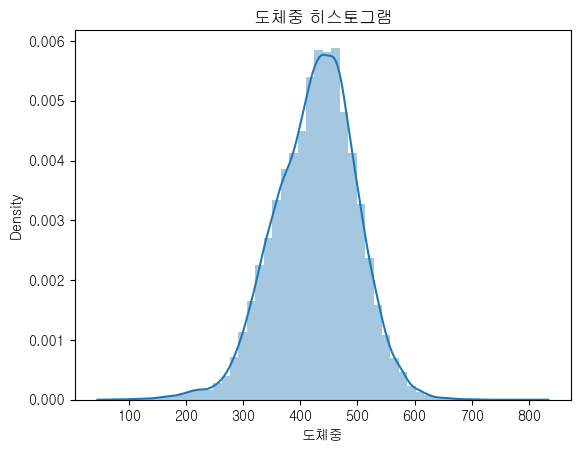

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


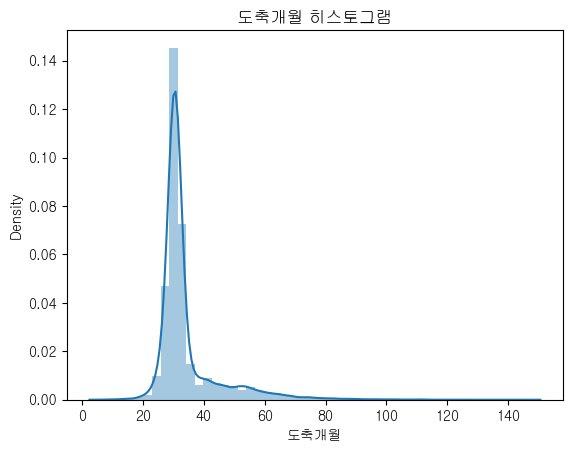

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":


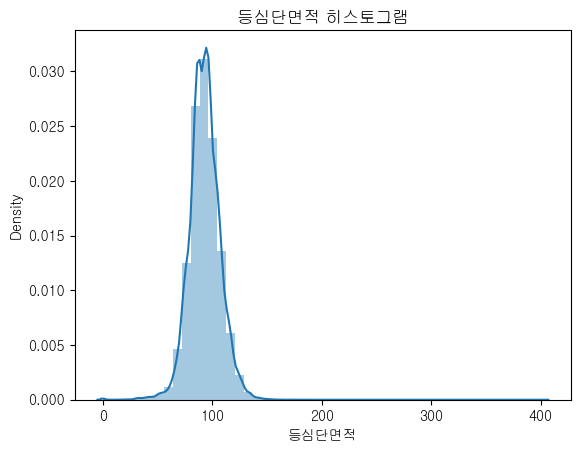

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()


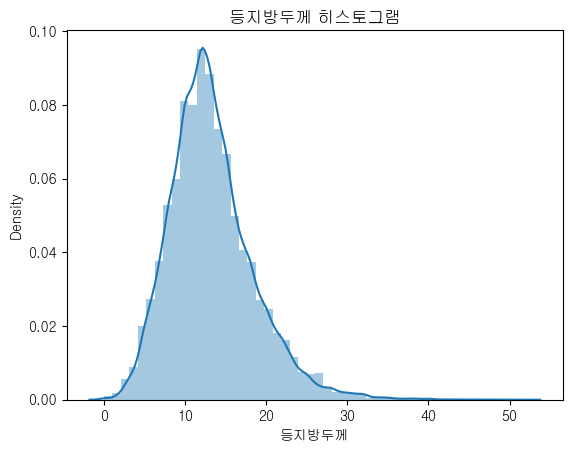

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



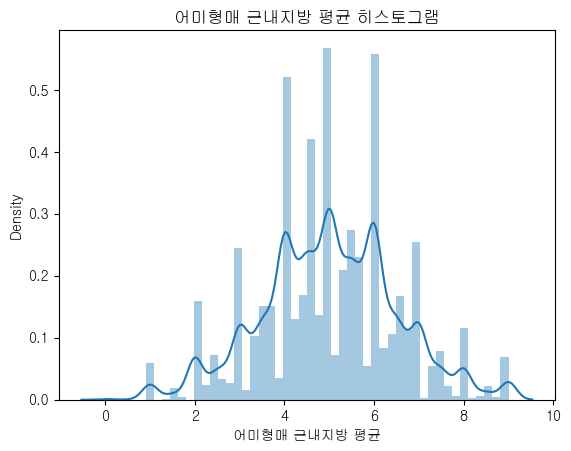

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



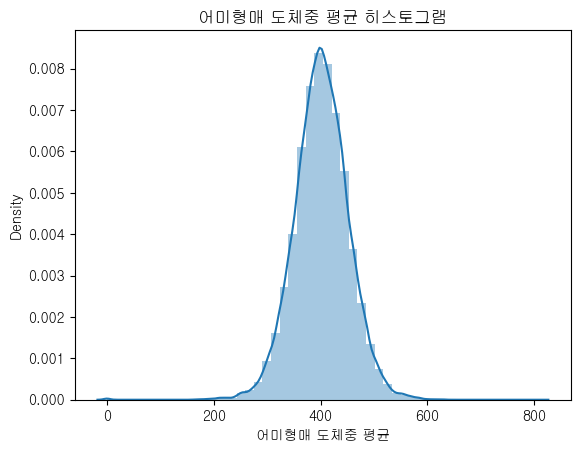

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



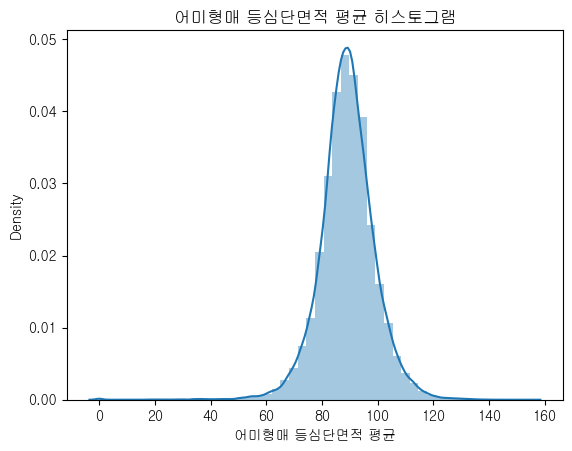

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



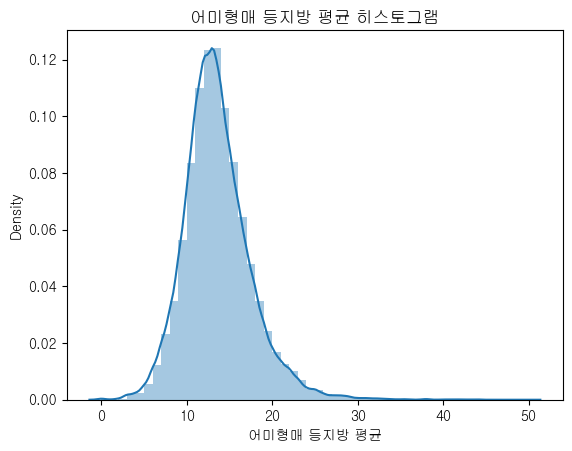

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



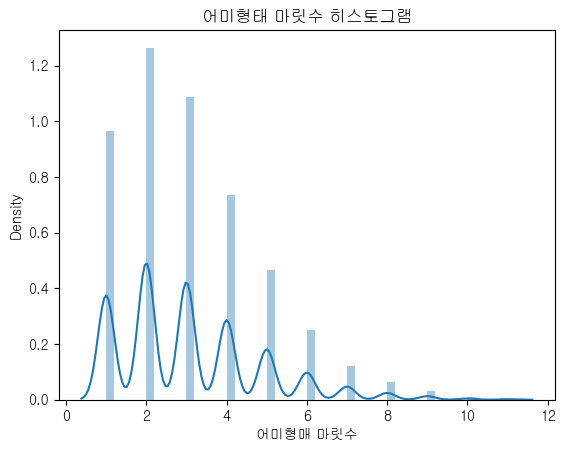

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



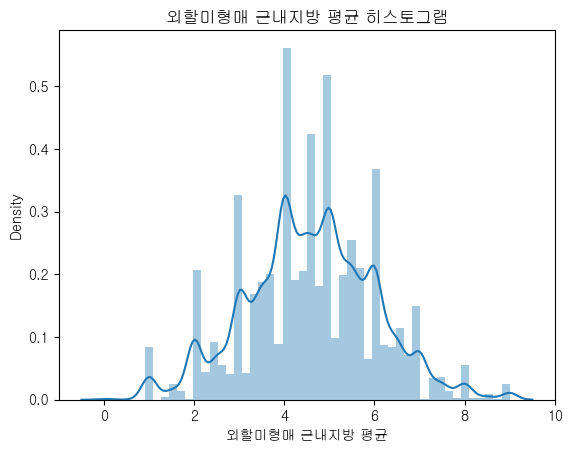

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



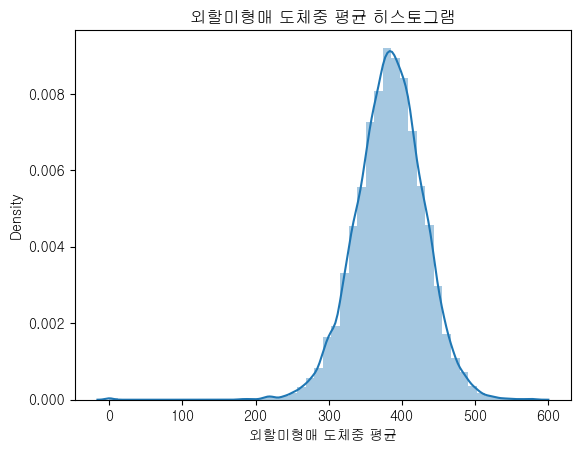

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



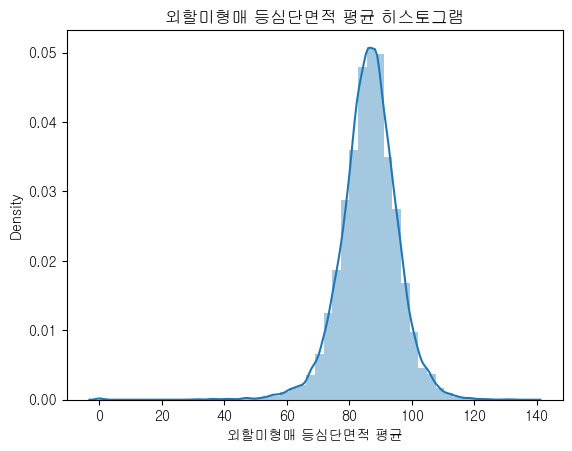

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:62: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



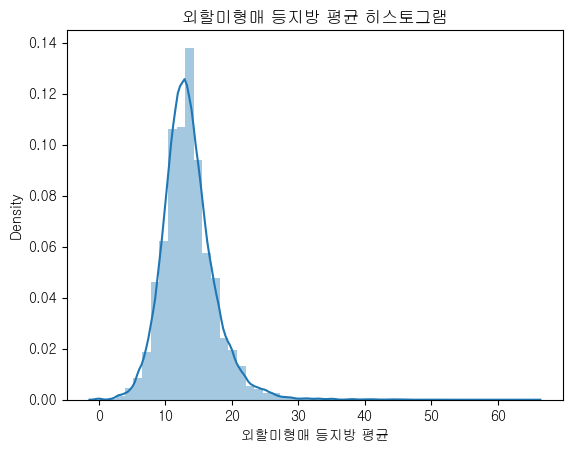

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



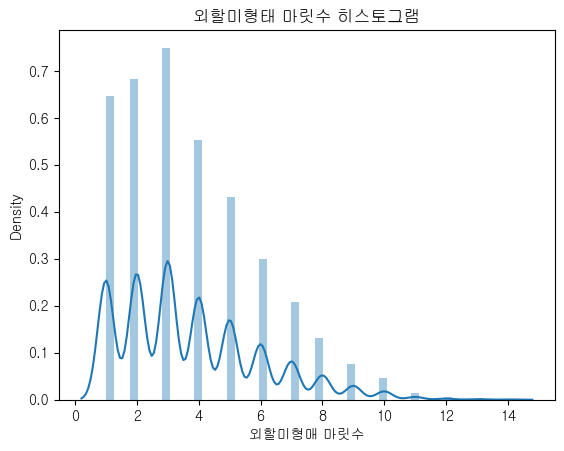

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:72: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



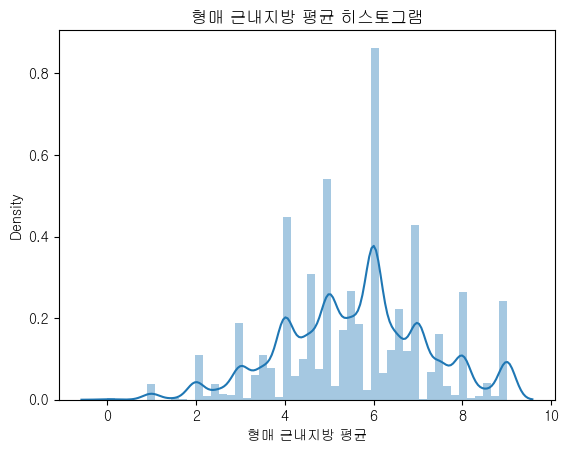

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



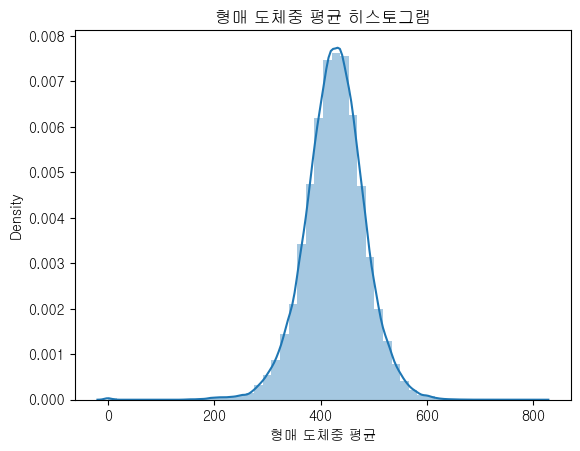

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:82: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



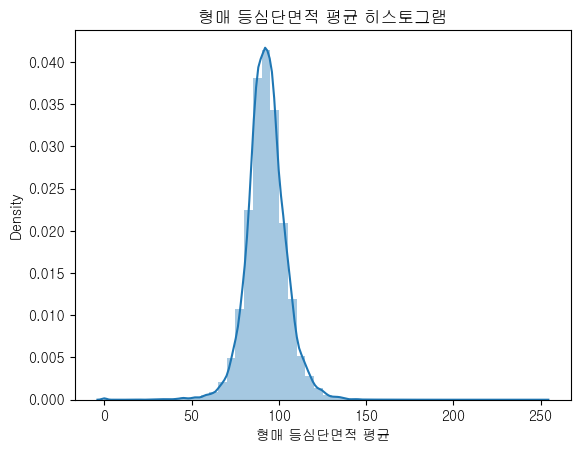

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:87: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



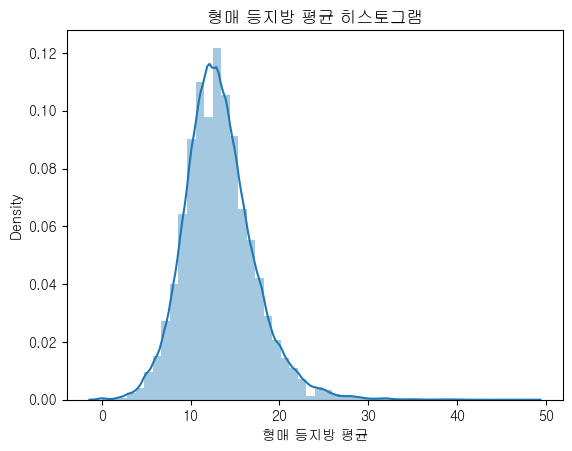

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:92: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



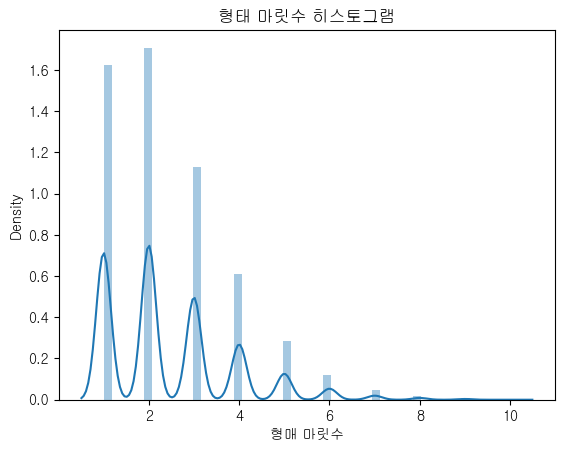

In [80]:
# 도체중
sns.distplot(cow_full_5.도체중)
plt.title('도체중 히스토그램')
plt.show()

# 도축개월
sns.distplot(cow_full_5.도축개월)
plt.title('도축개월 히스토그램')
plt.show()

# 등심단면적
sns.distplot(cow_full_5.등심단면적)
plt.title('등심단면적 히스토그램')
plt.show()

# 등지방두께
sns.distplot(cow_full_5.등지방두께)
plt.title('등지방두께 히스토그램')
plt.show()

# 어미형매 근내지방 평균
sns.distplot(cow_full_5['어미형매 근내지방 평균'])
plt.title('어미형매 근내지방 평균 히스토그램')
plt.show()

# 어미형매 도체중 평균
sns.distplot(cow_full_5['어미형매 도체중 평균'])
plt.title('어미형매 도체중 평균 히스토그램')
plt.show()

# 어미형매 등심단면적 평균
sns.distplot(cow_full_5['어미형매 등심단면적 평균'])
plt.title('어미형매 등심단면적 평균 히스토그램')
plt.show()

# 어미형매 등지방 평균
sns.distplot(cow_full_5['어미형매 등지방 평균'])
plt.title('어미형매 등지방 평균 히스토그램')
plt.show()

# 어미형매 마릿수
sns.distplot(cow_full_5['어미형매 마릿수'])
plt.title('어미형태 마릿수 히스토그램')
plt.show()

# 외할미형매 근내지방 평균
sns.distplot(cow_full_5['외할미형매 근내지방 평균'])
plt.title('외할미형매 근내지방 평균 히스토그램')
plt.show()

# 외할미형매 도체중 평균
sns.distplot(cow_full_5['외할미형매 도체중 평균'])
plt.title('외할미형매 도체중 평균 히스토그램')
plt.show()

# 외할미형매 등심단면적 평균
sns.distplot(cow_full_5['외할미형매 등심단면적 평균'])
plt.title('외할미형매 등심단면적 평균 히스토그램')
plt.show()

# 외할미형매 등지방 평균
sns.distplot(cow_full_5['외할미형매 등지방 평균'])
plt.title('외할미형매 등지방 평균 히스토그램')
plt.show()

# 외할미형매 마릿수
sns.distplot(cow_full_5['외할미형매 마릿수'])
plt.title('외할미형태 마릿수 히스토그램')
plt.show()

# 형매 근내지방 평균
sns.distplot(cow_full_5['형매 근내지방 평균'])
plt.title('형매 근내지방 평균 히스토그램')
plt.show()

# 형매 도체중 평균
sns.distplot(cow_full_5['형매 도체중 평균'])
plt.title('형매 도체중 평균 히스토그램')
plt.show()

# 형매 등심단면적 평균
sns.distplot(cow_full_5['형매 등심단면적 평균'])
plt.title('형매 등심단면적 평균 히스토그램')
plt.show()

# 형매 등지방 평균
sns.distplot(cow_full_5['형매 등지방 평균'])
plt.title('형매 등지방 평균 히스토그램')
plt.show()

# 형매 마릿수
sns.distplot(cow_full_5['형매 마릿수'])
plt.title('형태 마릿수 히스토그램')
plt.show()

<h5> 성별 프리마틴, 기타, 미경은 별로 없으므로 제거</h5>

In [8]:
# 17개 데이터 셋 총 합46310 제대로 불러와짐을 확인 
cow.shape 

(46310, 45)

In [ ]:
a = cow[(cow['gender']!='프리마틴')&(cow['gender']!='기타(프리마틴 등)')&(cow['gender']!='미경산')].copy()
print(a.shape)
a.columns

<h5> 육색, 지방색 등은 도축 이후 알 수 있는 정보이므로 제외하고, ID변수도 제거, Viya에서 사용해주기 위해 사용할 변수만 선택하기 </h5>

In [40]:
sas_data_5 = a[['gender','sl_m','s_w','s_m_w','s_m_i','s_f_m','s_t_m','s_c','a_s_m_w','a_s_m_i','a_s_f_m','a_s_t_m','a_s_c',
'b_s_m_w','b_s_m_i','b_s_f_m','b_s_t_m','b_s_c', 'c_s_m_w','c_s_m_i','c_s_f_m','c_s_t_m','c_s_c', 
'd_s_m_w','d_s_m_i','d_s_f_m','d_s_t_m','d_s_c', 'target']]
sas_data_5.shape

(46228, 29)

In [41]:
os.getcwd()

'C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 5계대'

In [43]:
sas_data_5.to_csv('cow_data_5_1.csv', encoding='utf-8',index=False)

<h5> 소 3대 데이터 확인 </h5>

In [10]:
cow_fa_0 = pd.read_excel('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 3계대\\근내지방_0.xlsx')
cow_fa_1 = pd.read_excel('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 3계대\\근내지방_1.xlsx')
cow_fa_2 = pd.read_excel('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 3계대\\근내지방_2.xlsx')

In [12]:
print(cow_fa_0.shape)
print(cow_fa_1.shape)
print(cow_fa_2.shape)

(30637, 33)
(41299, 33)
(36299, 33)


In [17]:
print(cow_fa_0.columns)

Index(['이표번호', 'KPN', '성별', '출생일', '도축개월', '도축일', '등급', '도체중', '등심단면적',
       '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '형매 도체중 평균',
       '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수', '외할미 이표번호',
       '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균', '어미형매 근내지방 평균',
       '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균', '외할미형매 등심단면적 평균',
       '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수'],
      dtype='object')


<h6> 3대 소 근내지방도 데이터 합치기 </h6>

In [18]:
# 파일이 존재하는 경로 불러오기 및 리스트
path_3 = 'C:\\Users\\Owner\\Desktop\\윤태준\소\\윤태준_김다은\\2022-11-25근내지방 3계대'
file_lst_3 = os.listdir(path_3)# 파일 이름 담기

In [19]:
# 반복문으로 파일 불러오기
df_3 = pd.DataFrame()
for i in file_lst_3:
    data = pd.read_excel(path_3 +'\\'+i)
    df_3 = pd.concat([df_3,data])
    
df_3 = df_3.reset_index(drop = True)

In [20]:
# 합쳐진 데이터 확인
df_3.shape

(532653, 33)

In [21]:
# 변수명 제대로 들어왔는지 확인
df_3.columns

Index(['이표번호', 'KPN', '성별', '출생일', '도축개월', '도축일', '등급', '도체중', '등심단면적',
       '등지방두께', '근내지방도', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '형매 도체중 평균',
       '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수', '외할미 이표번호',
       '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균', '어미형매 근내지방 평균',
       '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균', '외할미형매 등심단면적 평균',
       '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수'],
      dtype='object')

In [27]:
df_3.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 3계대\\cow_3.csv',encoding='cp949', index=False)

In [12]:
df_3 = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\3계대 정리\\cow_3.csv', encoding= 'cp949')

In [16]:
df_3.columns

Index(['id', 'kpn', 'gender', 'bir', 'sl_m', 'sl_d', 'class', 's_w', 'i_a',
       'f_t', 'target', 'b_c', 'f_c', 'm_l', 'organ', 'mom_id', 's_m_w',
       's_m_i', 's_f_m', 's_t_m', 's_c', 'a_id', 'a_s_m_w', 'a_s_m_i',
       'a_s_f_m', 'a_s_t_m', 'a_s_c', 'b_id', 'b_s_m_w', 'b_s_m_i', 'b_s_f_m',
       'b_s_t_m', 'b_s_c'],
      dtype='object')

<h5> 3대 성별과 근내지방도 막대그래프 </h5>

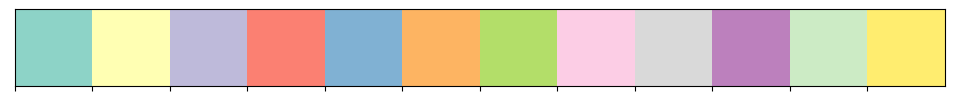

In [100]:
# 색깔 설정
palette = sns.color_palette('Set3')
sns.palplot(palette)

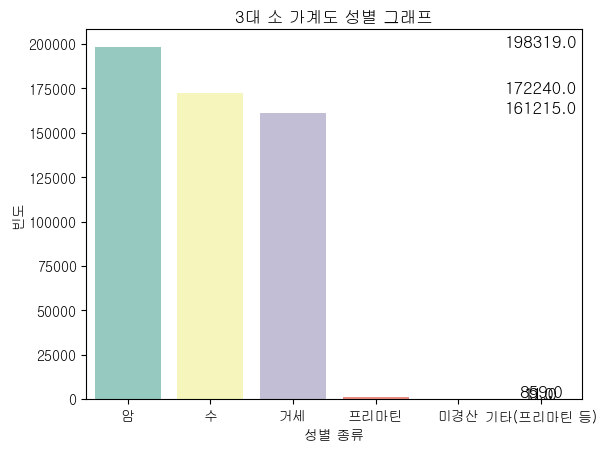

In [101]:
ax = sns.countplot(x = '성별', data=df_3, palette=palette, order=df_3.성별.value_counts().index)

# countplot에 값 표시
for i in ax.patches:
    height = i.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
plt.title('3대 소 가계도 성별 그래프')
plt.xlabel('성별 종류')
plt.ylabel('빈도')
plt.show()

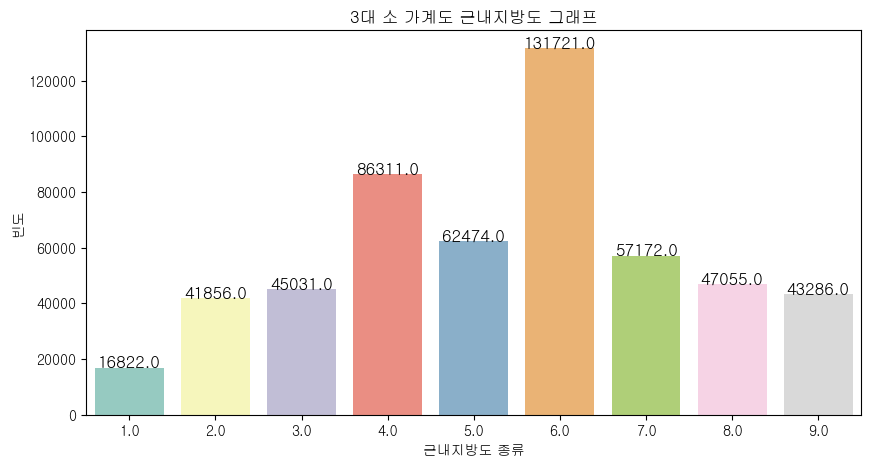

In [13]:
# 근내지방도 그래프
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'target', data=df_3, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('3대 소 가계도 근내지방도 그래프')

plt.xlabel('근내지방도 종류')
plt.ylabel('빈도')
plt.show()

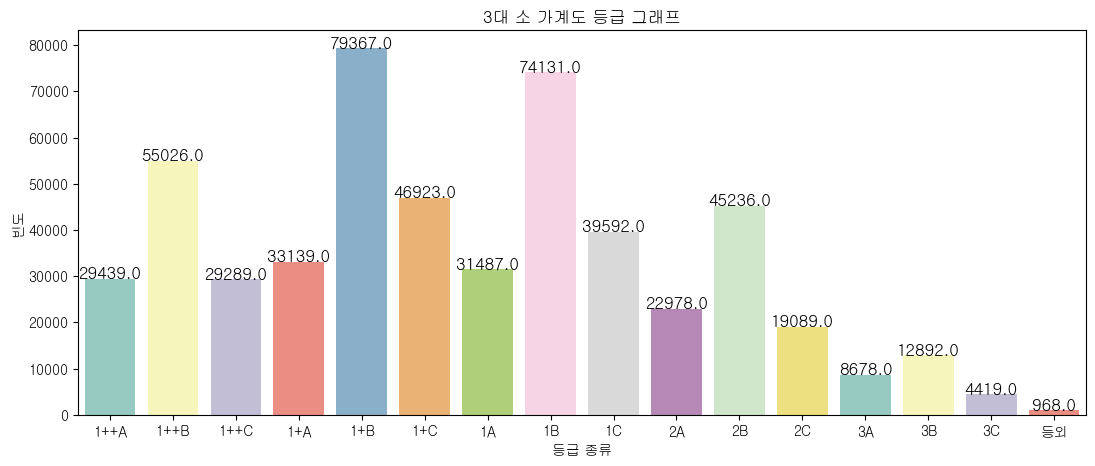

In [14]:
# 육색 그래프
plt.figure(figsize=(13,5))
ax = sns.countplot(x = 'class', data=df_3, palette=palette, order= ['1++A', '1++B', '1++C', '1+A','1+B', '1+C', '1A', '1B', '1C','2A', '2B',  
       '2C',  '3A', '3B', '3C', '등외'])

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('3대 소 가계도 등급 그래프')

plt.xlabel('등급 종류')
plt.ylabel('빈도')
plt.show()

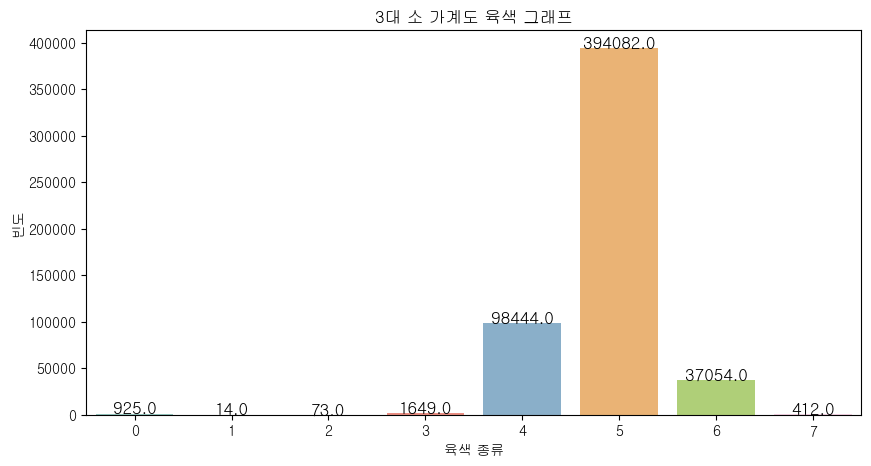

In [15]:
# 육색 그래프
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'b_c', data=df_3, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('3대 소 가계도 육색 그래프')

plt.xlabel('육색 종류')
plt.ylabel('빈도')
plt.show()

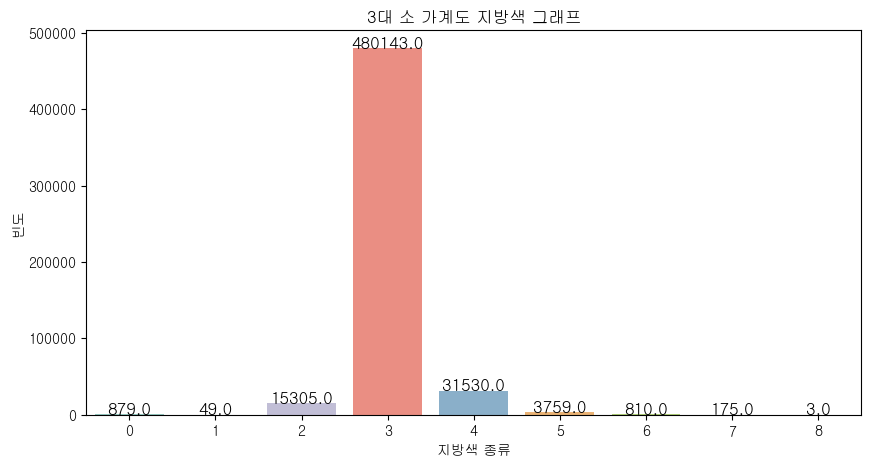

In [16]:
# 지방색 그래프
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'f_c', data=df_3, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('3대 소 가계도 지방색 그래프')

plt.xlabel('지방색 종류')
plt.ylabel('빈도')
plt.show()

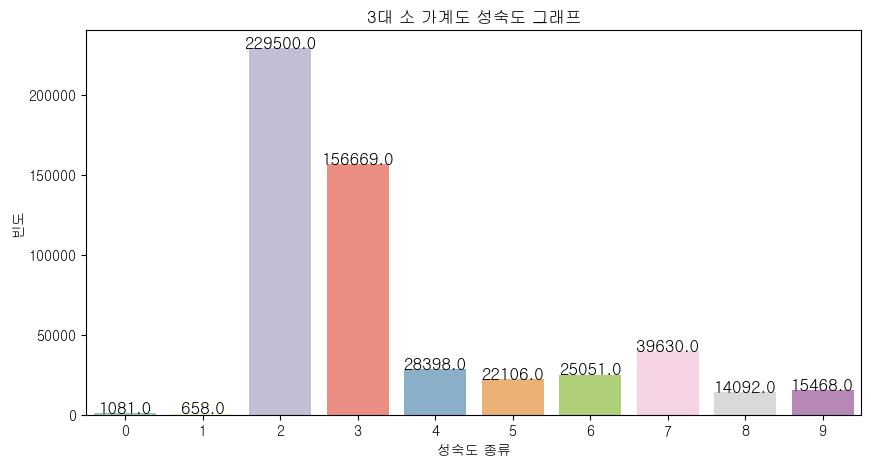

In [17]:
# 성숙도 그래프
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'm_l', data=df_3, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('3대 소 가계도 성숙도 그래프')

plt.xlabel('성숙도 종류')
plt.ylabel('빈도')
plt.show()

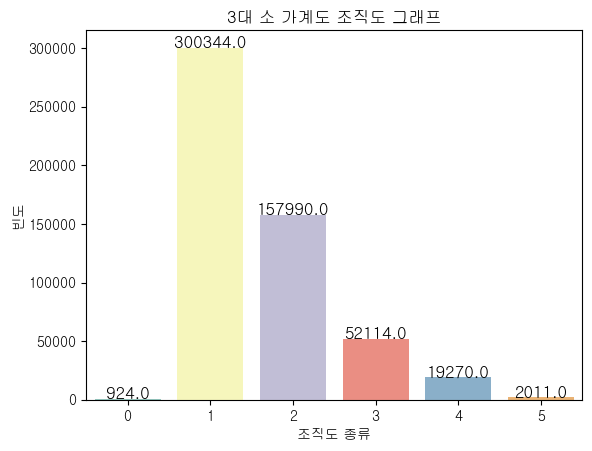

In [18]:
# 조직도 그래프
ax = sns.countplot(x = 'organ', data=df_3, palette=palette)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 12)
    
plt.title('3대 소 가계도 조직도 그래프')

plt.xlabel('조직도 종류')
plt.ylabel('빈도')
plt.show()

<h5> 3대 성별과 근내지방도를 제외한 연속형 변수 히스토그램 </h5>

In [58]:
cow_3_ko = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\3계대 정리\\cow_3_ko.csv', encoding='cp949')

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


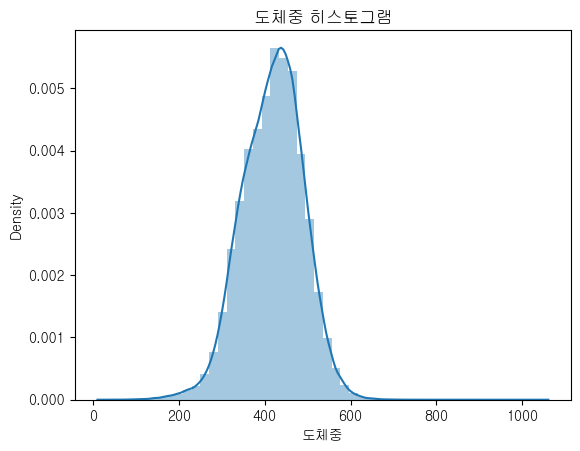

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


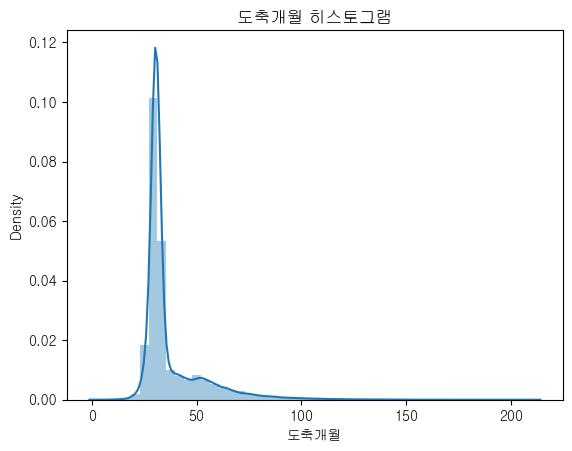

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":


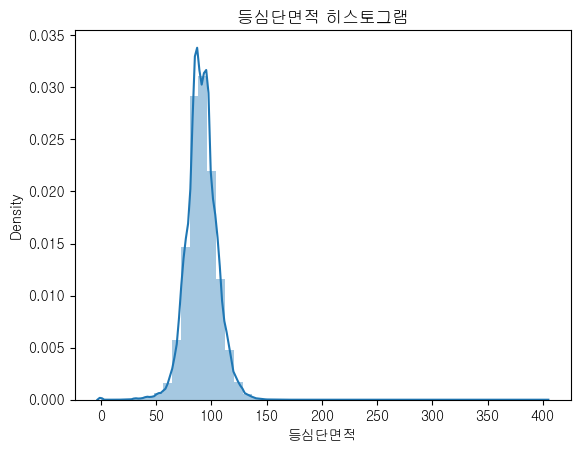

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()


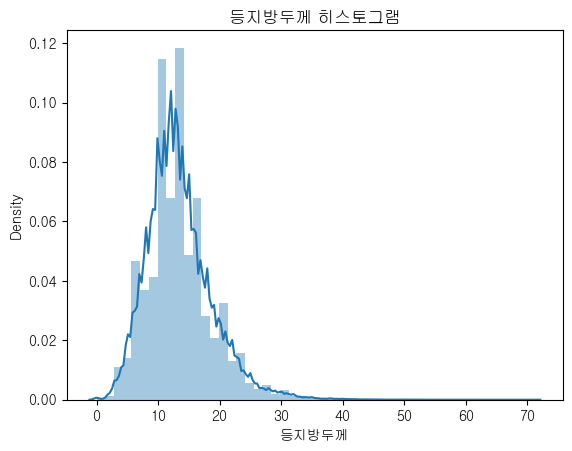

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



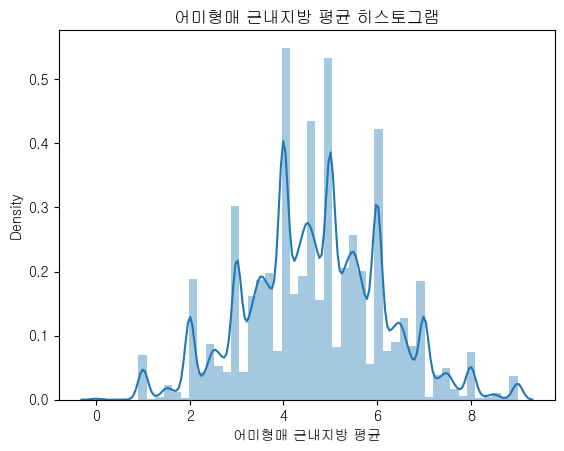

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



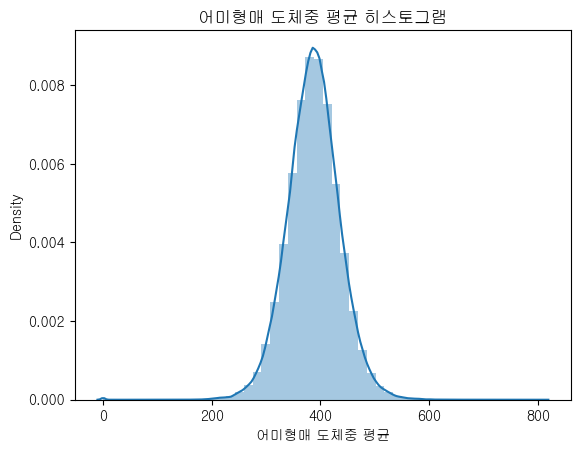

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



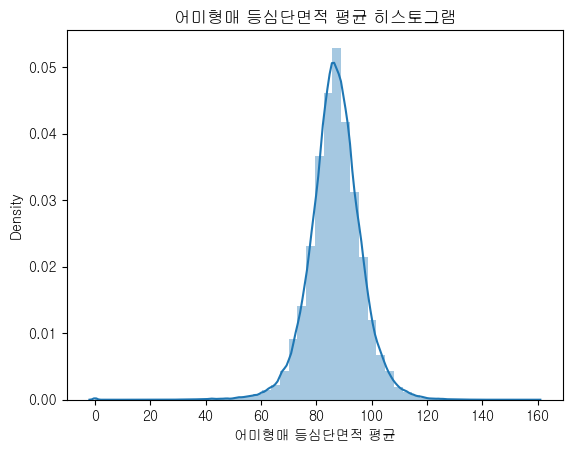

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



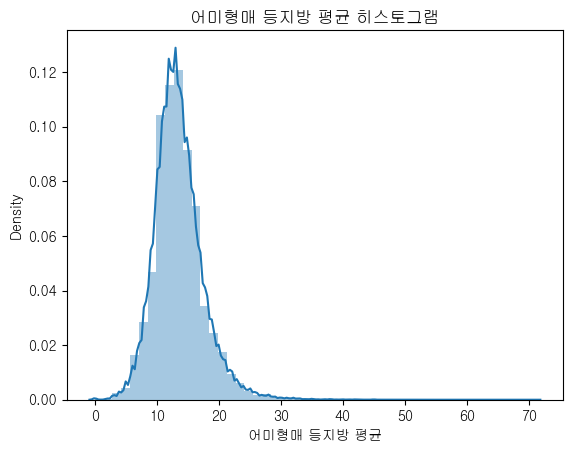

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



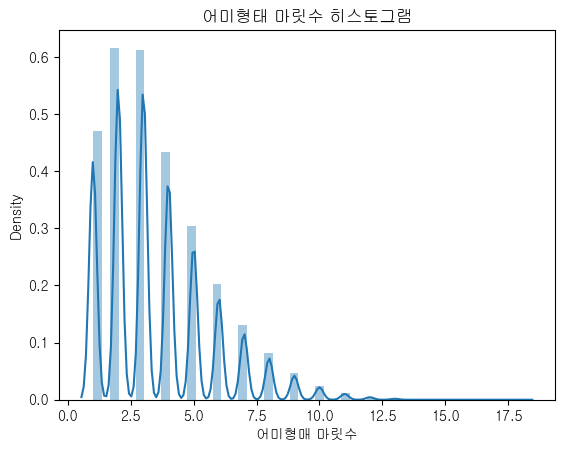

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



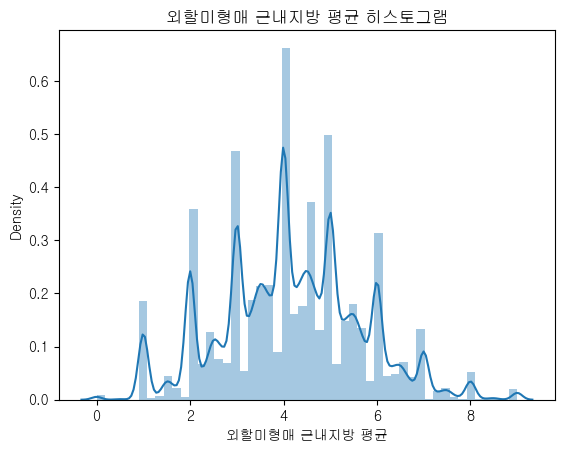

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



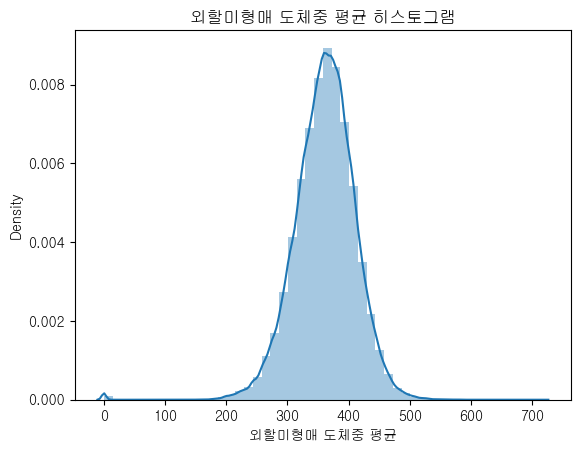

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



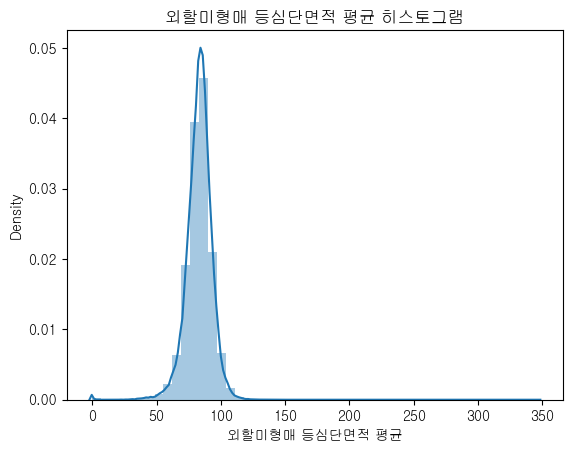

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:62: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



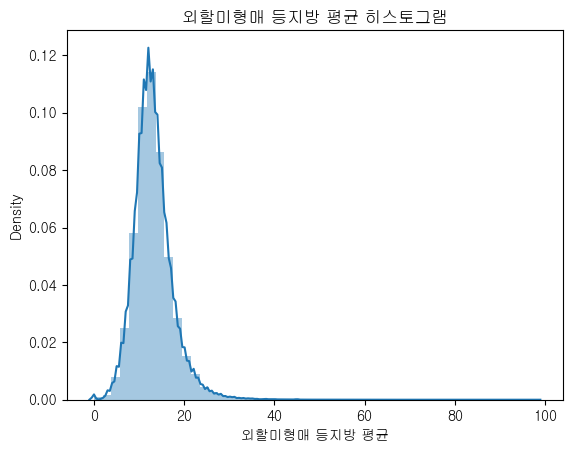

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



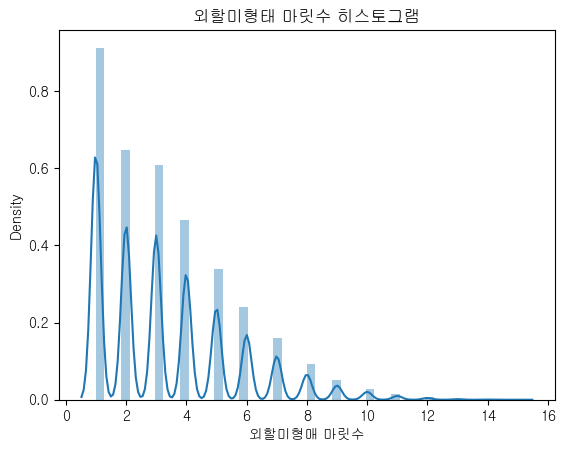

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:72: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



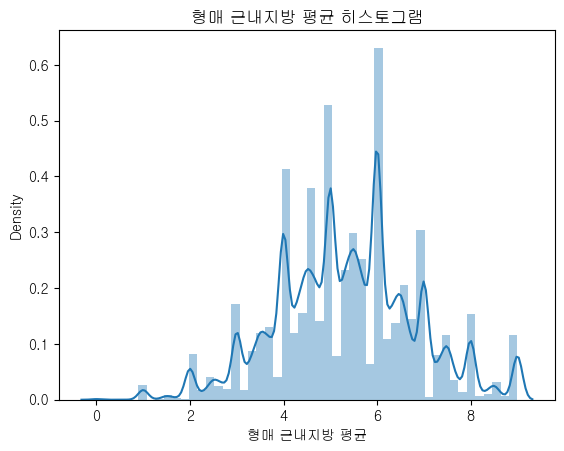

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



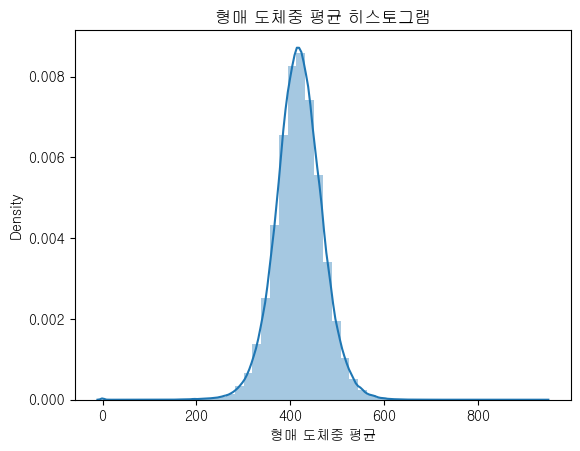

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:82: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



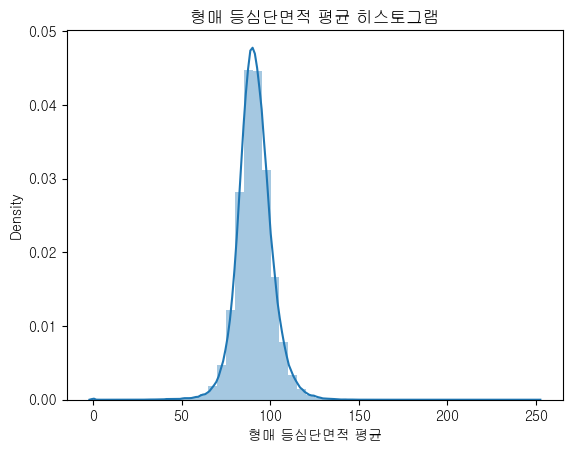

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:87: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



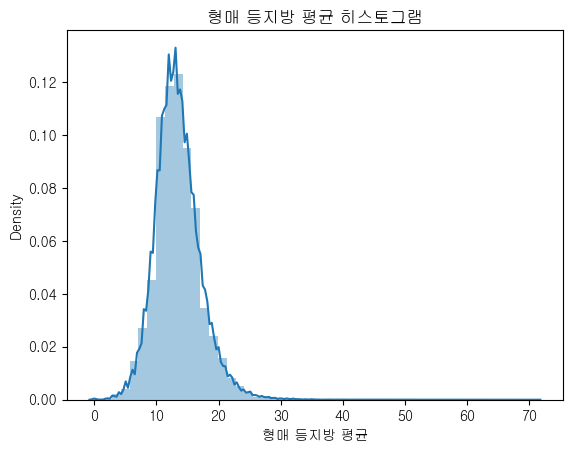

C:\Users\Owner\Desktop\윤태준\파이썬\newvenv\lib\site-packages\ipykernel_launcher.py:92: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



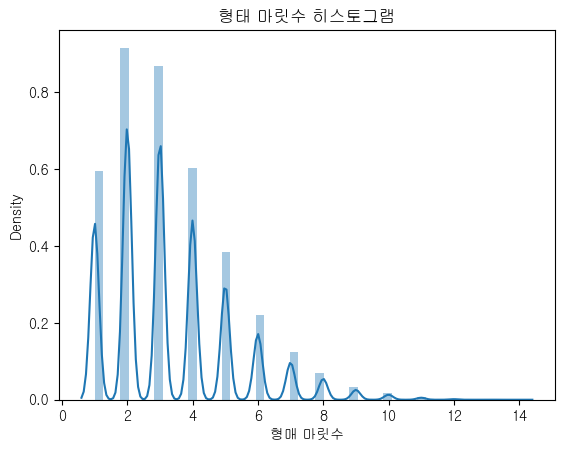

In [76]:
# 도체중
sns.distplot(cow_3_ko.도체중)
plt.title('도체중 히스토그램')
plt.show()

# 도축개월
sns.distplot(cow_3_ko.도축개월)
plt.title('도축개월 히스토그램')
plt.show()

# 등심단면적
sns.distplot(cow_3_ko.등심단면적)
plt.title('등심단면적 히스토그램')
plt.show()

# 등지방두께
sns.distplot(cow_3_ko.등지방두께)
plt.title('등지방두께 히스토그램')
plt.show()

# 어미형매 근내지방 평균
sns.distplot(cow_3_ko['어미형매 근내지방 평균'])
plt.title('어미형매 근내지방 평균 히스토그램')
plt.show()

# 어미형매 도체중 평균
sns.distplot(cow_3_ko['어미형매 도체중 평균'])
plt.title('어미형매 도체중 평균 히스토그램')
plt.show()

# 어미형매 등심단면적 평균
sns.distplot(cow_3_ko['어미형매 등심단면적 평균'])
plt.title('어미형매 등심단면적 평균 히스토그램')
plt.show()

# 어미형매 등지방 평균
sns.distplot(cow_3_ko['어미형매 등지방 평균'])
plt.title('어미형매 등지방 평균 히스토그램')
plt.show()

# 어미형매 마릿수
sns.distplot(cow_3_ko['어미형매 마릿수'])
plt.title('어미형태 마릿수 히스토그램')
plt.show()

# 외할미형매 근내지방 평균
sns.distplot(cow_3_ko['외할미형매 근내지방 평균'])
plt.title('외할미형매 근내지방 평균 히스토그램')
plt.show()

# 외할미형매 도체중 평균
sns.distplot(cow_3_ko['외할미형매 도체중 평균'])
plt.title('외할미형매 도체중 평균 히스토그램')
plt.show()

# 외할미형매 등심단면적 평균
sns.distplot(cow_3_ko['외할미형매 등심단면적 평균'])
plt.title('외할미형매 등심단면적 평균 히스토그램')
plt.show()

# 외할미형매 등지방 평균
sns.distplot(cow_3_ko['외할미형매 등지방 평균'])
plt.title('외할미형매 등지방 평균 히스토그램')
plt.show()

# 외할미형매 마릿수
sns.distplot(cow_3_ko['외할미형매 마릿수'])
plt.title('외할미형태 마릿수 히스토그램')
plt.show()

# 형매 근내지방 평균
sns.distplot(cow_3_ko['형매 근내지방 평균'])
plt.title('형매 근내지방 평균 히스토그램')
plt.show()

# 형매 도체중 평균
sns.distplot(cow_3_ko['형매 도체중 평균'])
plt.title('형매 도체중 평균 히스토그램')
plt.show()

# 형매 등심단면적 평균
sns.distplot(cow_3_ko['형매 등심단면적 평균'])
plt.title('형매 등심단면적 평균 히스토그램')
plt.show()

# 형매 등지방 평균
sns.distplot(cow_3_ko['형매 등지방 평균'])
plt.title('형매 등지방 평균 히스토그램')
plt.show()

# 형매 마릿수
sns.distplot(cow_3_ko['형매 마릿수'])
plt.title('형태 마릿수 히스토그램')
plt.show()